<a href="https://colab.research.google.com/github/victormurcia/CTS_Test/blob/main/EDA_NCT05240508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 17)

In [ ]:
#Load Patient Dataframe
url = 'https://raw.githubusercontent.com/victormurcia/CTS_Test/main/MDClone/NCT05240508.csv'
cohort = pd.read_csv(url)
cohort

,date of birth,gender at birth,cancer_diagnosis-age when condition was documented,cancer_diagnosis-condition documentation date-time,copy of cancer_diagnosis condition documentation date time,consent-health factor,chemotherapy-procedure,immunotherapy-procedure,hormonal_therapy-procedure
0,1949.250000,Male,65.631907,2014.916667,True,True,True,False,False
1,1950.250000,Male,65.664931,2015.916667,True,True,True,False,False
2,1963.166667,Male,58.097306,2021.250000,True,True,True,False,False
3,1948.583333,Male,59.705616,2008.333333,True,True,True,False,False
4,1951.000000,Male,64.744605,2015.833333,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
929,1932.750000,Male,68.296888,2001.083333,True,True,True,False,False
930,1964.000000,Male,55.102172,2019.083333,True,True,True,False,False
931,1951.500000,Male,52.450715,2004.000000,True,True,True,False,False
932,1950.166667,Male,68.160256,2018.333333,True,True,True,False,False


In [ ]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   date of birth                                               934 non-null    float64
 1   gender at birth                                             934 non-null    object 
 2   cancer_diagnosis-age when condition was documented          934 non-null    float64
 3   cancer_diagnosis-condition documentation date-time          934 non-null    float64
 4   copy of cancer_diagnosis condition documentation date time  934 non-null    bool   
 5   consent-health factor                                       934 non-null    bool   
 6   chemotherapy-procedure                                      934 non-null    bool   
 7   immunotherapy-procedure                                     934 non-null    bool   
 8   h

In [ ]:
def calculate_null_percentage(df):
    total_rows = df.shape[0]
    null_percentages = df.isnull().sum() / total_rows * 100
    return null_percentages

print('Attribute                                       %Null')
print('-----------------------------------------------------')
calculate_null_percentage(cohort)

Attribute                                       %Null
-----------------------------------------------------


date of birth                                                 0.0
gender at birth                                               0.0
cancer_diagnosis-age when condition was documented            0.0
cancer_diagnosis-condition documentation date-time            0.0
copy of cancer_diagnosis condition documentation date time    0.0
consent-health factor                                         0.0
chemotherapy-procedure                                        0.0
immunotherapy-procedure                                       0.0
hormonal_therapy-procedure                                    0.0
dtype: float64

In [ ]:
#Convert year to an integer
cohort['date of birth'] = cohort['date of birth'].round().astype(int)
# Get the current year
current_year = datetime.datetime.now().year
cohort['age'] = current_year - cohort['date of birth']
#Remove patients whose age exceeds 65 or is below 18
cohort = cohort[(cohort['age'] < 65) & (cohort['age'] > 18)].reset_index().drop(['index'], axis=1)
cohort

,date of birth,gender at birth,cancer_diagnosis-age when condition was documented,cancer_diagnosis-condition documentation date-time,copy of cancer_diagnosis condition documentation date time,consent-health factor,chemotherapy-procedure,immunotherapy-procedure,hormonal_therapy-procedure,age
0,1963,Male,58.097306,2021.250000,True,True,True,False,False,60
1,1967,Male,53.364978,2020.166667,True,True,True,False,False,56
2,1960,Male,59.317599,2019.583333,True,True,True,False,False,63
3,1961,Male,54.472029,2015.666667,True,True,True,False,False,62
4,1960,Male,61.274126,2021.333333,True,True,True,False,False,63
...,...,...,...,...,...,...,...,...,...,...
207,1962,Male,56.800237,2018.416667,True,True,True,False,False,61
208,1967,Female,52.255591,2018.833333,True,True,True,False,False,56
209,1967,Male,52.888817,2019.833333,True,True,True,False,False,56
210,1975,Female,33.268508,2008.166667,True,True,True,False,False,48


In [ ]:
# Calculate the percentage of non-False values in each column
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
nf = cohort[nonnumeric_columns].drop('gender at birth',axis=1)
percentage_non_false = (nf == True) | (nf == 'True')
percentage_non_false = percentage_non_false.sum() / len(nf) * 100
print('Attribute                                       %True')
print('-----------------------------------------------------')
print(percentage_non_false)

Attribute                                       %True
-----------------------------------------------------
copy of cancer_diagnosis condition documentation date time    100.0
consent-health factor                                         100.0
chemotherapy-procedure                                        100.0
immunotherapy-procedure                                         0.0
hormonal_therapy-procedure                                      0.0
dtype: float64


In [ ]:
def plot_util(df,cols_to_plot,plot_type,figsize=(12,6)):

  # Determine the number of rows and columns for subplots
  num_columns = len(cols_to_plot)
  if num_columns <= 4:
      nrows = 1
      ncols = num_columns
  else:
      nrows = (num_columns + 2) // 3  # Round up to the nearest integer
      ncols = 4

  # Create a grid of plots using Matplotlib's subplots
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  # Flatten the axes array
  axes = axes.ravel()

  # Create a color palette
  colors = sns.color_palette("Set2", n_colors=num_columns)

  # Iterate over numeric columns and create histograms
  for i, column in enumerate(cols_to_plot):
      ax = axes[i]

      #Select plot type:
      if plot_type == 'hist':
        # Plot histogram for the current column with a different color
        sns.histplot(data=df, x=column, kde=True, color=colors[i], ax=ax)
      elif plot_type == 'count':
        # Create count plot for the current column
        sns.countplot(data=df, x=column, color=colors[i], ax=ax)
      
      ax.set_title(column)
      ax.set_ylabel("Counts")

  # Remove any unused subplots
  if num_columns < nrows * ncols:
    for j in range(num_columns, nrows * ncols):
        fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
  return -1

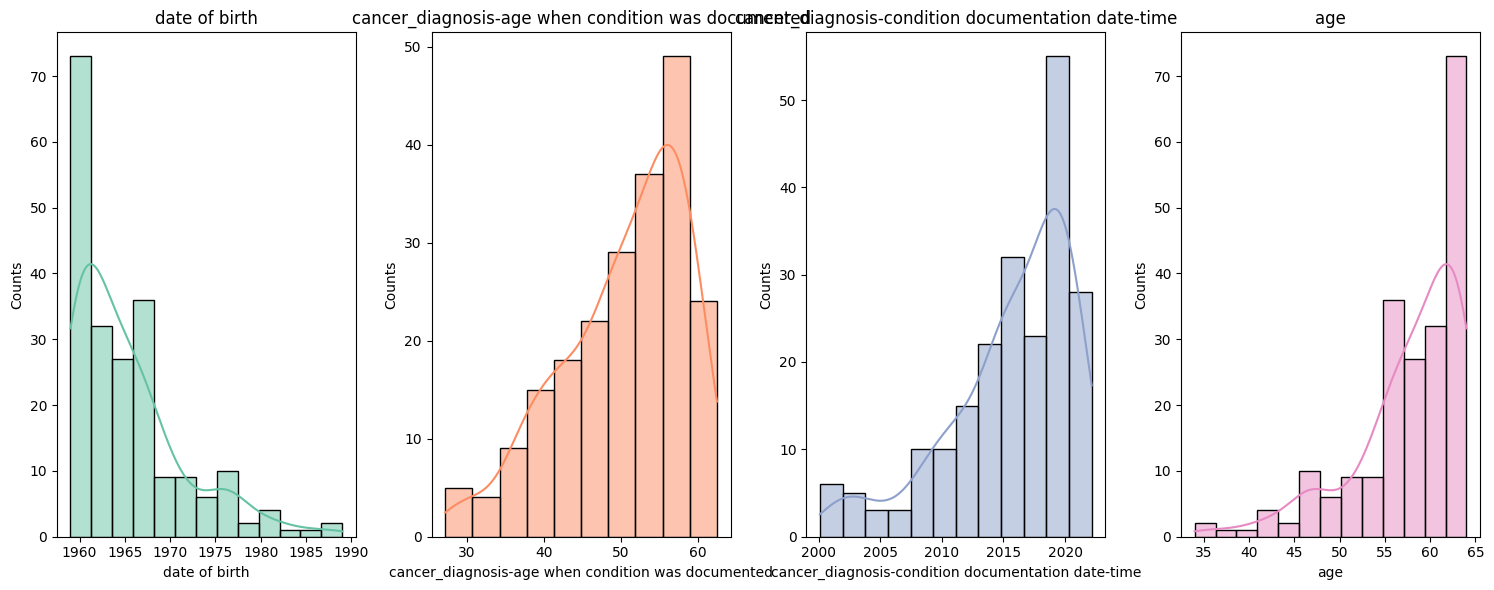

-1

In [ ]:
numeric_cols = cohort.select_dtypes(include=['number']).columns 
plot_util(cohort,numeric_cols,'hist',figsize=(15,6))

In [ ]:
# Calculate descriptive statistics
cols_to_plot = numeric_cols
stats = cohort[cols_to_plot].describe()
stats

,date of birth,cancer_diagnosis-age when condition was documented,cancer_diagnosis-condition documentation date-time,age
count,212.000000,212.000000,212.000000,212.000000
mean,1965.216981,50.363916,2015.599057,57.783019
std,6.097944,8.051968,5.106516,6.097944
min,1959.000000,27.193123,2000.083333,34.000000
25%,1961.000000,45.236339,2013.604167,55.000000
50%,1964.000000,52.180174,2016.625000,59.000000
75%,1968.000000,56.814814,2019.583333,62.000000
max,1989.000000,62.461492,2022.166667,64.000000


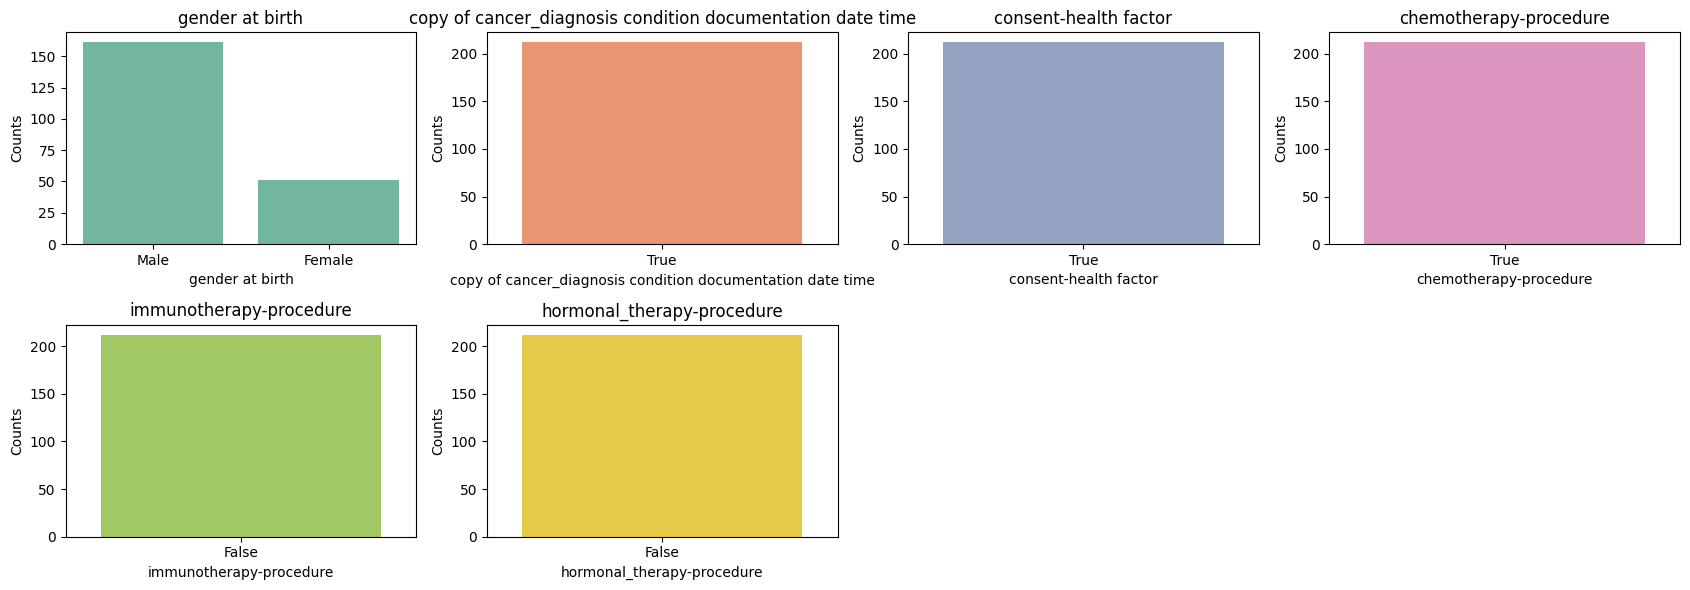

-1

In [ ]:
#nonnumeric_cols = [x for x in cohort.columns if x not in numeric_cols]
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
plot_util(cohort,nonnumeric_columns,'count',figsize=(17,6))

In [ ]:
cohort.select_dtypes(exclude=['number']).columns

Index(['gender at birth',
       'copy of cancer_diagnosis condition documentation date time',
       'consent-health factor', 'chemotherapy-procedure',
       'immunotherapy-procedure', 'hormonal_therapy-procedure'],
      dtype='object')

In [ ]:
for attribute in nonnumeric_columns:
  print(cohort[attribute].value_counts())

Male      161
Female     51
Name: gender at birth, dtype: int64
True    212
Name: copy of cancer_diagnosis condition documentation date time, dtype: int64
True    212
Name: consent-health factor, dtype: int64
True    212
Name: chemotherapy-procedure, dtype: int64
False    212
Name: immunotherapy-procedure, dtype: int64
False    212
Name: hormonal_therapy-procedure, dtype: int64


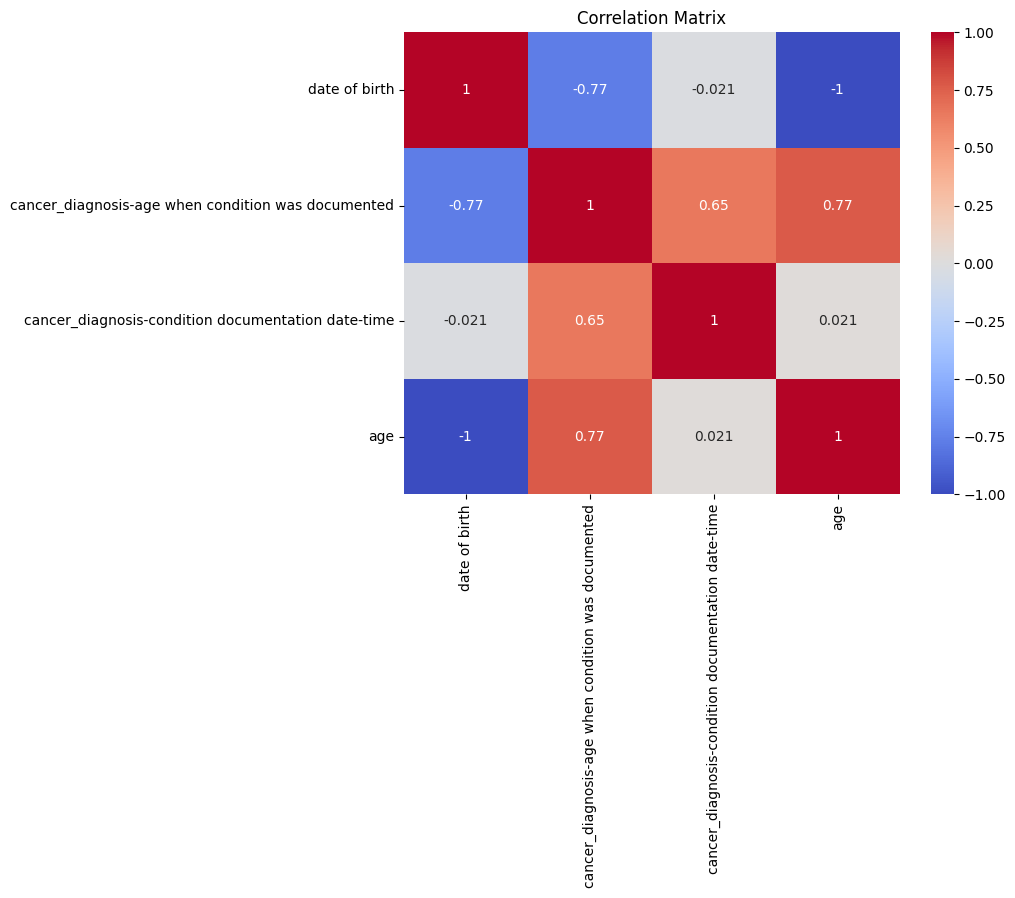

In [ ]:
# Calculate the correlation matrix
corr_matrix = cohort[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()